## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

#tuning
from sklearn.model_selection import train_test_split,GridSearchCV

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#evaluation
from sklearn.metrics import f1_score,classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score

pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

## Load Data

In [20]:
df = pd.read_csv("https://media.githubusercontent.com/media/Marsh16/smoking-drinking-ALP-ML/main/smoking_drinking_data.csv")

In [21]:
df.describe()

age         height         weight      waistline  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       47.614491     162.240625      63.284050      81.233358   
std        14.181339       9.282957      12.514241      11.850323   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     155.000000      55.000000      74.100000   
50%        45.000000     160.000000      60.000000      81.000000   
75%        60.000000     170.000000      70.000000      87.800000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean        0.980834       0.978429       1.031495       1.030476   
std         0.605949       0.604774       0.174650       0.171892   
min         0.100000       0.100000       1.000000       1.000000   
25%         0.700000       0.700000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.200000       1.200000       1.000000       1.000000   
max         9.900000       9.900000       2.000000       2.000000   

                 SBP            DBP           BLDS      tot_chole  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean      122.432498      76.052627     100.424447     195.557020   
std        14.543148       9.889365      24.179960      38.660155   
min        67.000000      32.000000      25.000000      30.000000   
25%       112.000000      70.000000      88.000000     169.000000   
50%       120.000000      76.000000      96.000000     193.000000   
75%       131.000000      82.000000     105.000000     219.000000   
max       273.000000     185.000000     852.000000    2344.000000   

           HDL_chole      LDL_chole   triglyceride     hemoglobin  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       56.936800     113.037692     132.141751      14.229824   
std        17.238479      35.842812     102.196985       1.584929   
min         1.000000       1.000000       1.000000       1.000000   
25%        46.000000      89.000000      73.000000      13.200000   
50%        55.000000     111.000000     106.000000      14.300000   
75%        66.000000     135.000000     159.000000      15.400000   
max      8110.000000    5119.000000    9490.000000      25.000000   

       urine_protein  serum_creatinine       SGOT_AST       SGOT_ALT  \
count  991346.000000     991346.000000  991346.000000  991346.000000   
mean        1.094224          0.860467      25.989308      25.755051   
std         0.437724          0.480530      23.493386      26.308599   
min         1.000000          0.100000       1.000000       1.000000   
25%         1.000000          0.700000      19.000000      15.000000   
50%         1.000000          0.800000      23.000000      20.000000   
75%         1.000000          1.000000      28.000000      29.000000   
max         6.000000         98.000000    9999.000000    7210.000000   

           gamma_GTP  SMK_stat_type_cd  
count  991346.000000     991346.000000  
mean       37.136347          1.608122  
std        50.424153          0.818507  
min         1.000000          1.000000  
25%        16.000000          1.000000  
50%        23.000000          1.000000  
75%        39.000000          2.000000  
max       999.000000          3.000000

In [22]:
df.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  LDL_chole  \
0         1.0  120.0  80.0   99.0      193.0       48.0      126.0   
1         1.0  130.0  82.0  106.0      228.0       55.0      148.0   
2         1.0  120.0  70.0   98.0      136.0       41.0       74.0   
3         1.0  145.0  87.0   95.0      201.0       76.0      104.0   
4         1.0  138.0  82.0  101.0      199.0       61.0      117.0   

   triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0          92.0        17.1            1.0               1.0      21.0   
1         121.0        15.8            1.0               0.9      20.0   
2         104.0        15.8            1.0               0.9      47.0   
3         106.0        17.6            1.0               1.1      29.0   
4         104.0        13.8            1.0               0.8      19.0   

   SGOT_ALT  gamma_GTP  SMK_stat_type_cd DRK_YN  
0      35.0       40.0               1.0      Y  
1      36.0       27.0               3.0      N  
2      32.0       68.0               1.0      N  
3      34.0       18.0               1.0      N  
4      12.0       25.0               1.0      N

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991320 entries, 0 to 991345
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991320 non-null  int64  
 1   age               991320 non-null  int64  
 2   height            991320 non-null  int64  
 3   waistline         991320 non-null  float64
 4   sight_left        991320 non-null  float64
 5   sight_right       991320 non-null  float64
 6   hear_left         991320 non-null  float64
 7   hear_right        991320 non-null  float64
 8   SBP               991320 non-null  float64
 9   DBP               991320 non-null  float64
 10  BLDS              991320 non-null  float64
 11  tot_chole         991320 non-null  float64
 12  HDL_chole         991320 non-null  float64
 13  LDL_chole         991320 non-null  float64
 14  urine_protein     991320 non-null  float64
 15  serum_creatinine  991320 non-null  float64
 16  SGOT_AST          991320 

In [23]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [24]:
df.duplicated().sum()

26

## Preprocessing

In [25]:
df["sex"] = df["sex"].map({"Male": 0, "Female": 1})
df["DRK_YN"] = df["DRK_YN"].map({"Y": 1, "N": 0})

smk_stat_mapping = {1: 0, 2: 1, 3: 2}
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].map(smk_stat_mapping)
df.drop(['weight', 'hemoglobin', 'triglyceride'], axis=1, inplace=True)

In [26]:
df = df.drop_duplicates()

In [27]:
df.isnull().any()

sex                 False
age                 False
height              False
waistline           False
sight_left          False
sight_right         False
hear_left           False
hear_right          False
SBP                 False
DBP                 False
BLDS                False
tot_chole           False
HDL_chole           False
LDL_chole           False
urine_protein       False
serum_creatinine    False
SGOT_AST            False
SGOT_ALT            False
gamma_GTP           False
SMK_stat_type_cd    False
DRK_YN              False
dtype: bool

In [28]:
df.describe().T

count        mean        std    min    25%    50%    75%  \
sex               991320.0    0.468992   0.499038    0.0    0.0    0.0    1.0   
age               991320.0   47.614529  14.181346   20.0   35.0   45.0   60.0   
height            991320.0  162.240563   9.282922  130.0  155.0  160.0  170.0   
waistline         991320.0   81.233255  11.850296    8.0   74.1   81.0   87.8   
sight_left        991320.0    0.980833   0.605954    0.1    0.7    1.0    1.2   
sight_right       991320.0    0.978428   0.604779    0.1    0.7    1.0    1.2   
hear_left         991320.0    1.031495   0.174652    1.0    1.0    1.0    1.0   
hear_right        991320.0    1.030476   0.171892    1.0    1.0    1.0    1.0   
SBP               991320.0  122.432360  14.543083   67.0  112.0  120.0  131.0   
DBP               991320.0   76.052549   9.889334   32.0   70.0   76.0   82.0   
BLDS              991320.0  100.424305  24.179852   25.0   88.0   96.0  105.0   
tot_chole         991320.0  195.556769  38.660092   30.0  169.0  193.0  219.0   
HDL_chole         991320.0   56.936984  17.238578    1.0   46.0   55.0   66.0   
LDL_chole         991320.0  113.037429  35.842938    1.0   89.0  111.0  135.0   
urine_protein     991320.0    1.094221   0.437719    1.0    1.0    1.0    1.0   
serum_creatinine  991320.0    0.860467   0.480536    0.1    0.7    0.8    1.0   
SGOT_AST          991320.0   25.989424  23.493668    1.0   19.0   23.0   28.0   
SGOT_ALT          991320.0   25.755148  26.308910    1.0   15.0   20.0   29.0   
gamma_GTP         991320.0   37.136152  50.423811    1.0   16.0   23.0   39.0   
SMK_stat_type_cd  991320.0    0.608112   0.818504    0.0    0.0    0.0    1.0   
DRK_YN            991320.0    0.499814   0.500000    0.0    0.0    0.0    1.0   

                     max  
sex                  1.0  
age                 85.0  
height             190.0  
waistline          999.0  
sight_left           9.9  
sight_right          9.9  
hear_left            2.0  
hear_right           2.0  
SBP                273.0  
DBP                185.0  
BLDS               852.0  
tot_chole         2344.0  
HDL_chole         8110.0  
LDL_chole         5119.0  
urine_protein        6.0  
serum_creatinine    98.0  
SGOT_AST          9999.0  
SGOT_ALT          7210.0  
gamma_GTP          999.0  
SMK_stat_type_cd     2.0  
DRK_YN               1.0

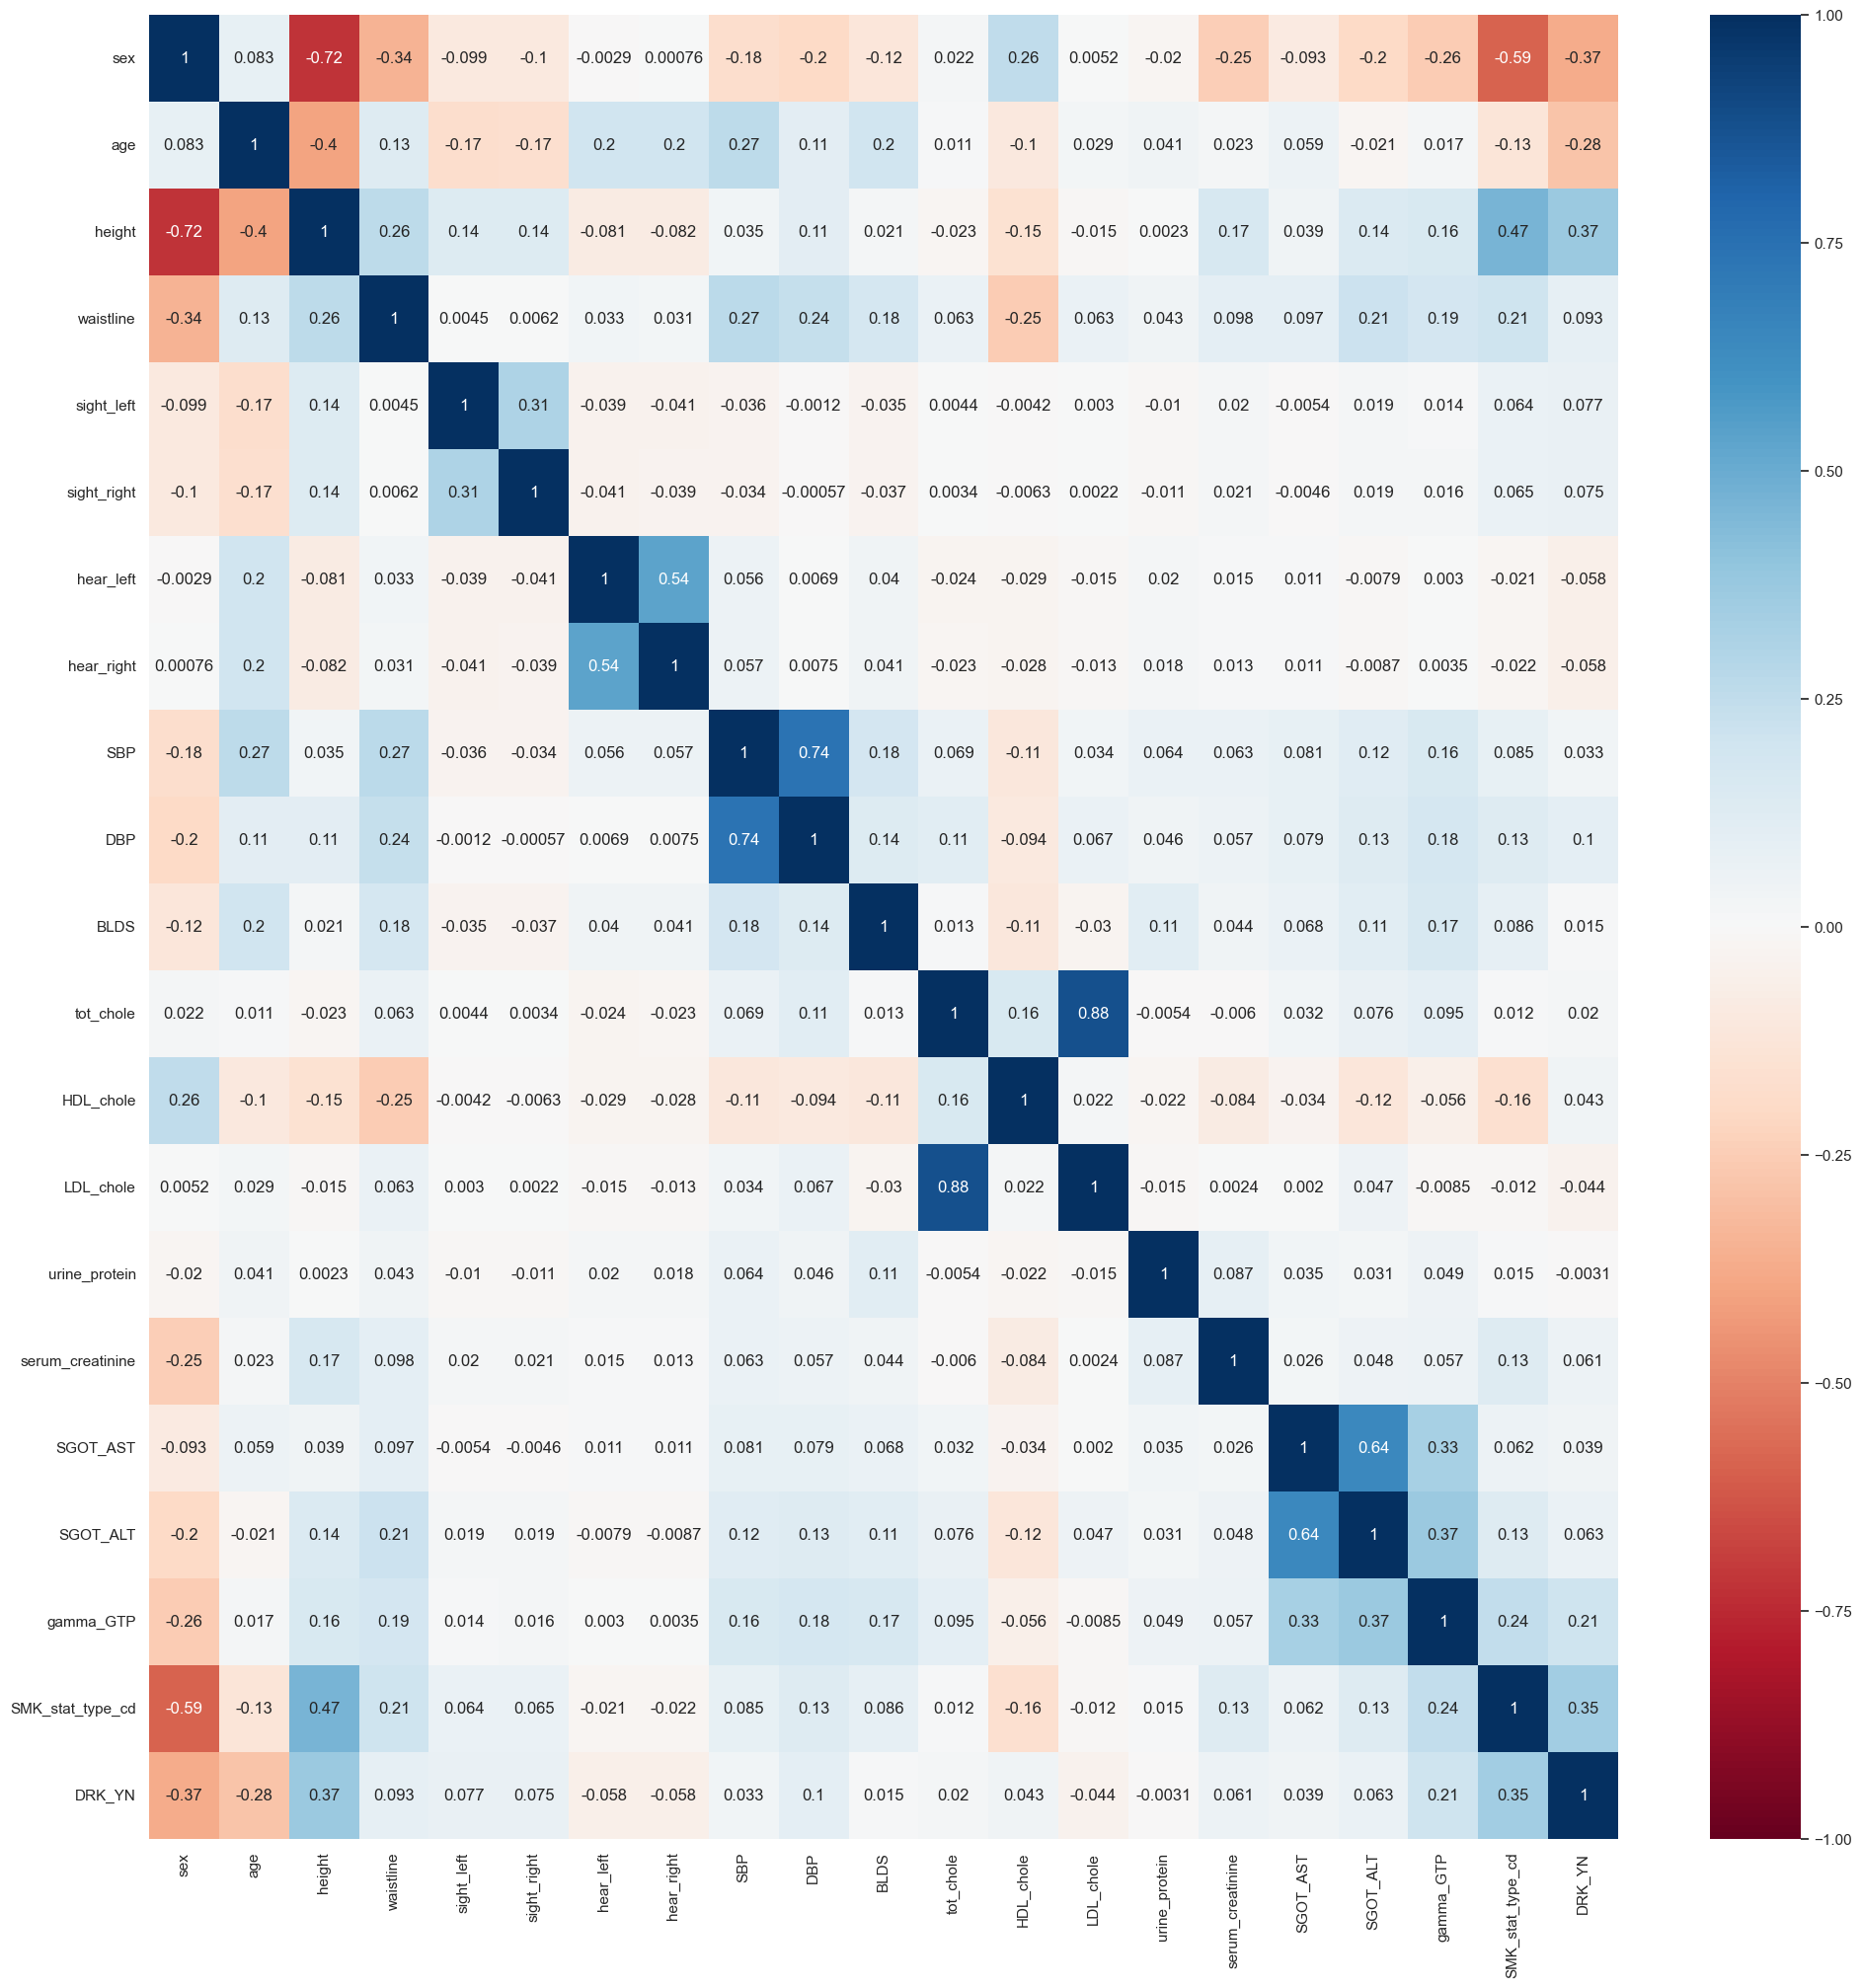

In [58]:
plt.figure(figsize=(24, 24))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

In [45]:
(df == 0).sum()

sex                 526399
age                      0
height                   0
waistline                0
sight_left               0
sight_right              0
hear_left                0
hear_right               0
SBP                      0
DBP                      0
BLDS                     0
tot_chole                0
HDL_chole                0
LDL_chole                0
urine_protein            0
serum_creatinine         0
SGOT_AST                 0
SGOT_ALT                 0
gamma_GTP                0
SMK_stat_type_cd    602431
DRK_YN              495844
dtype: int64

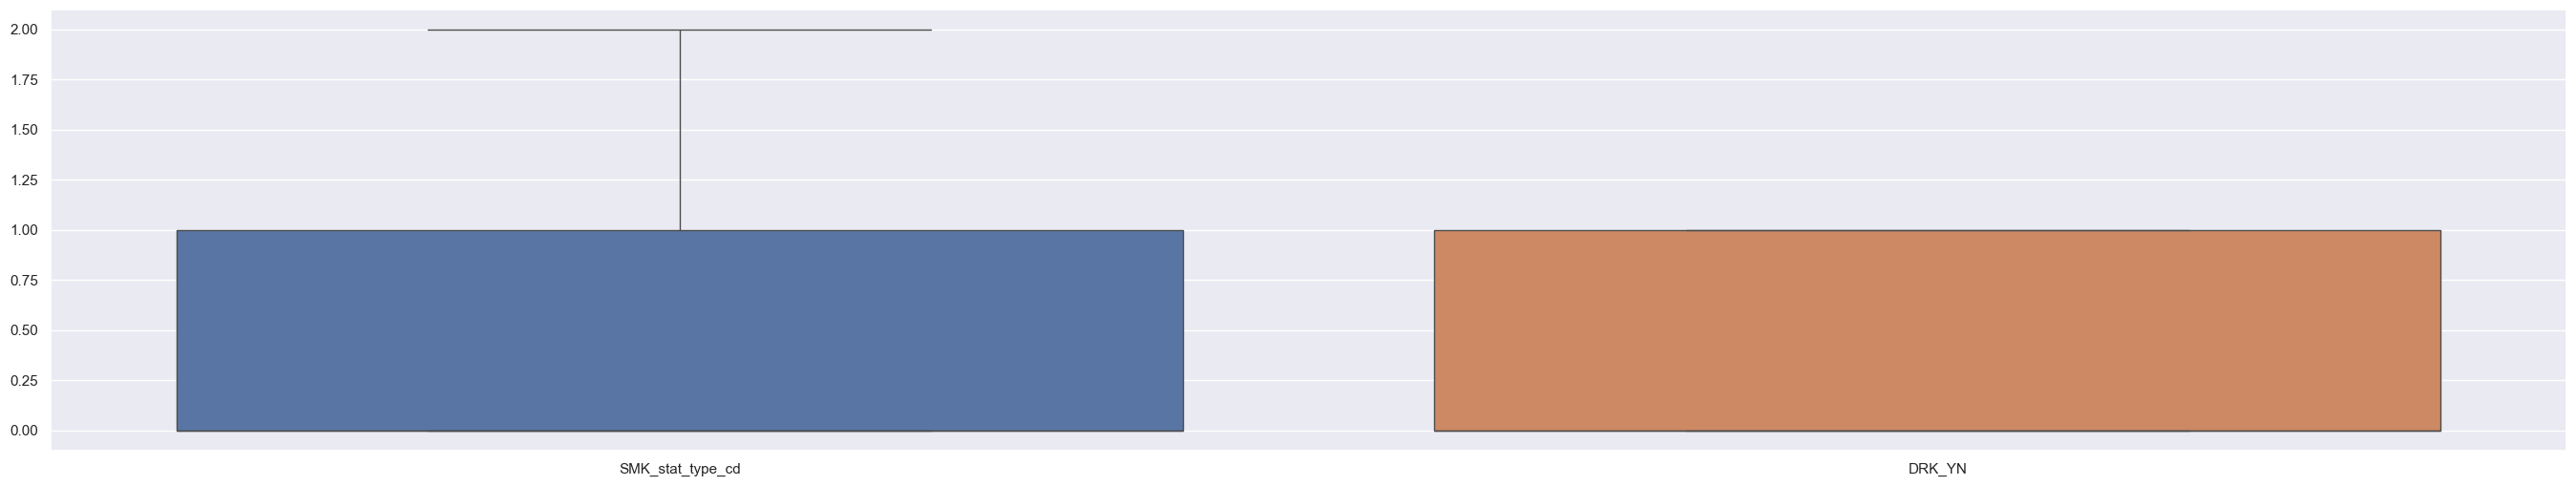

In [38]:
# Fit and transform the categorical data
plt.figure(figsize=(34, 6))
sns.boxplot(data=df[['SMK_stat_type_cd','DRK_YN']])
plt.show()

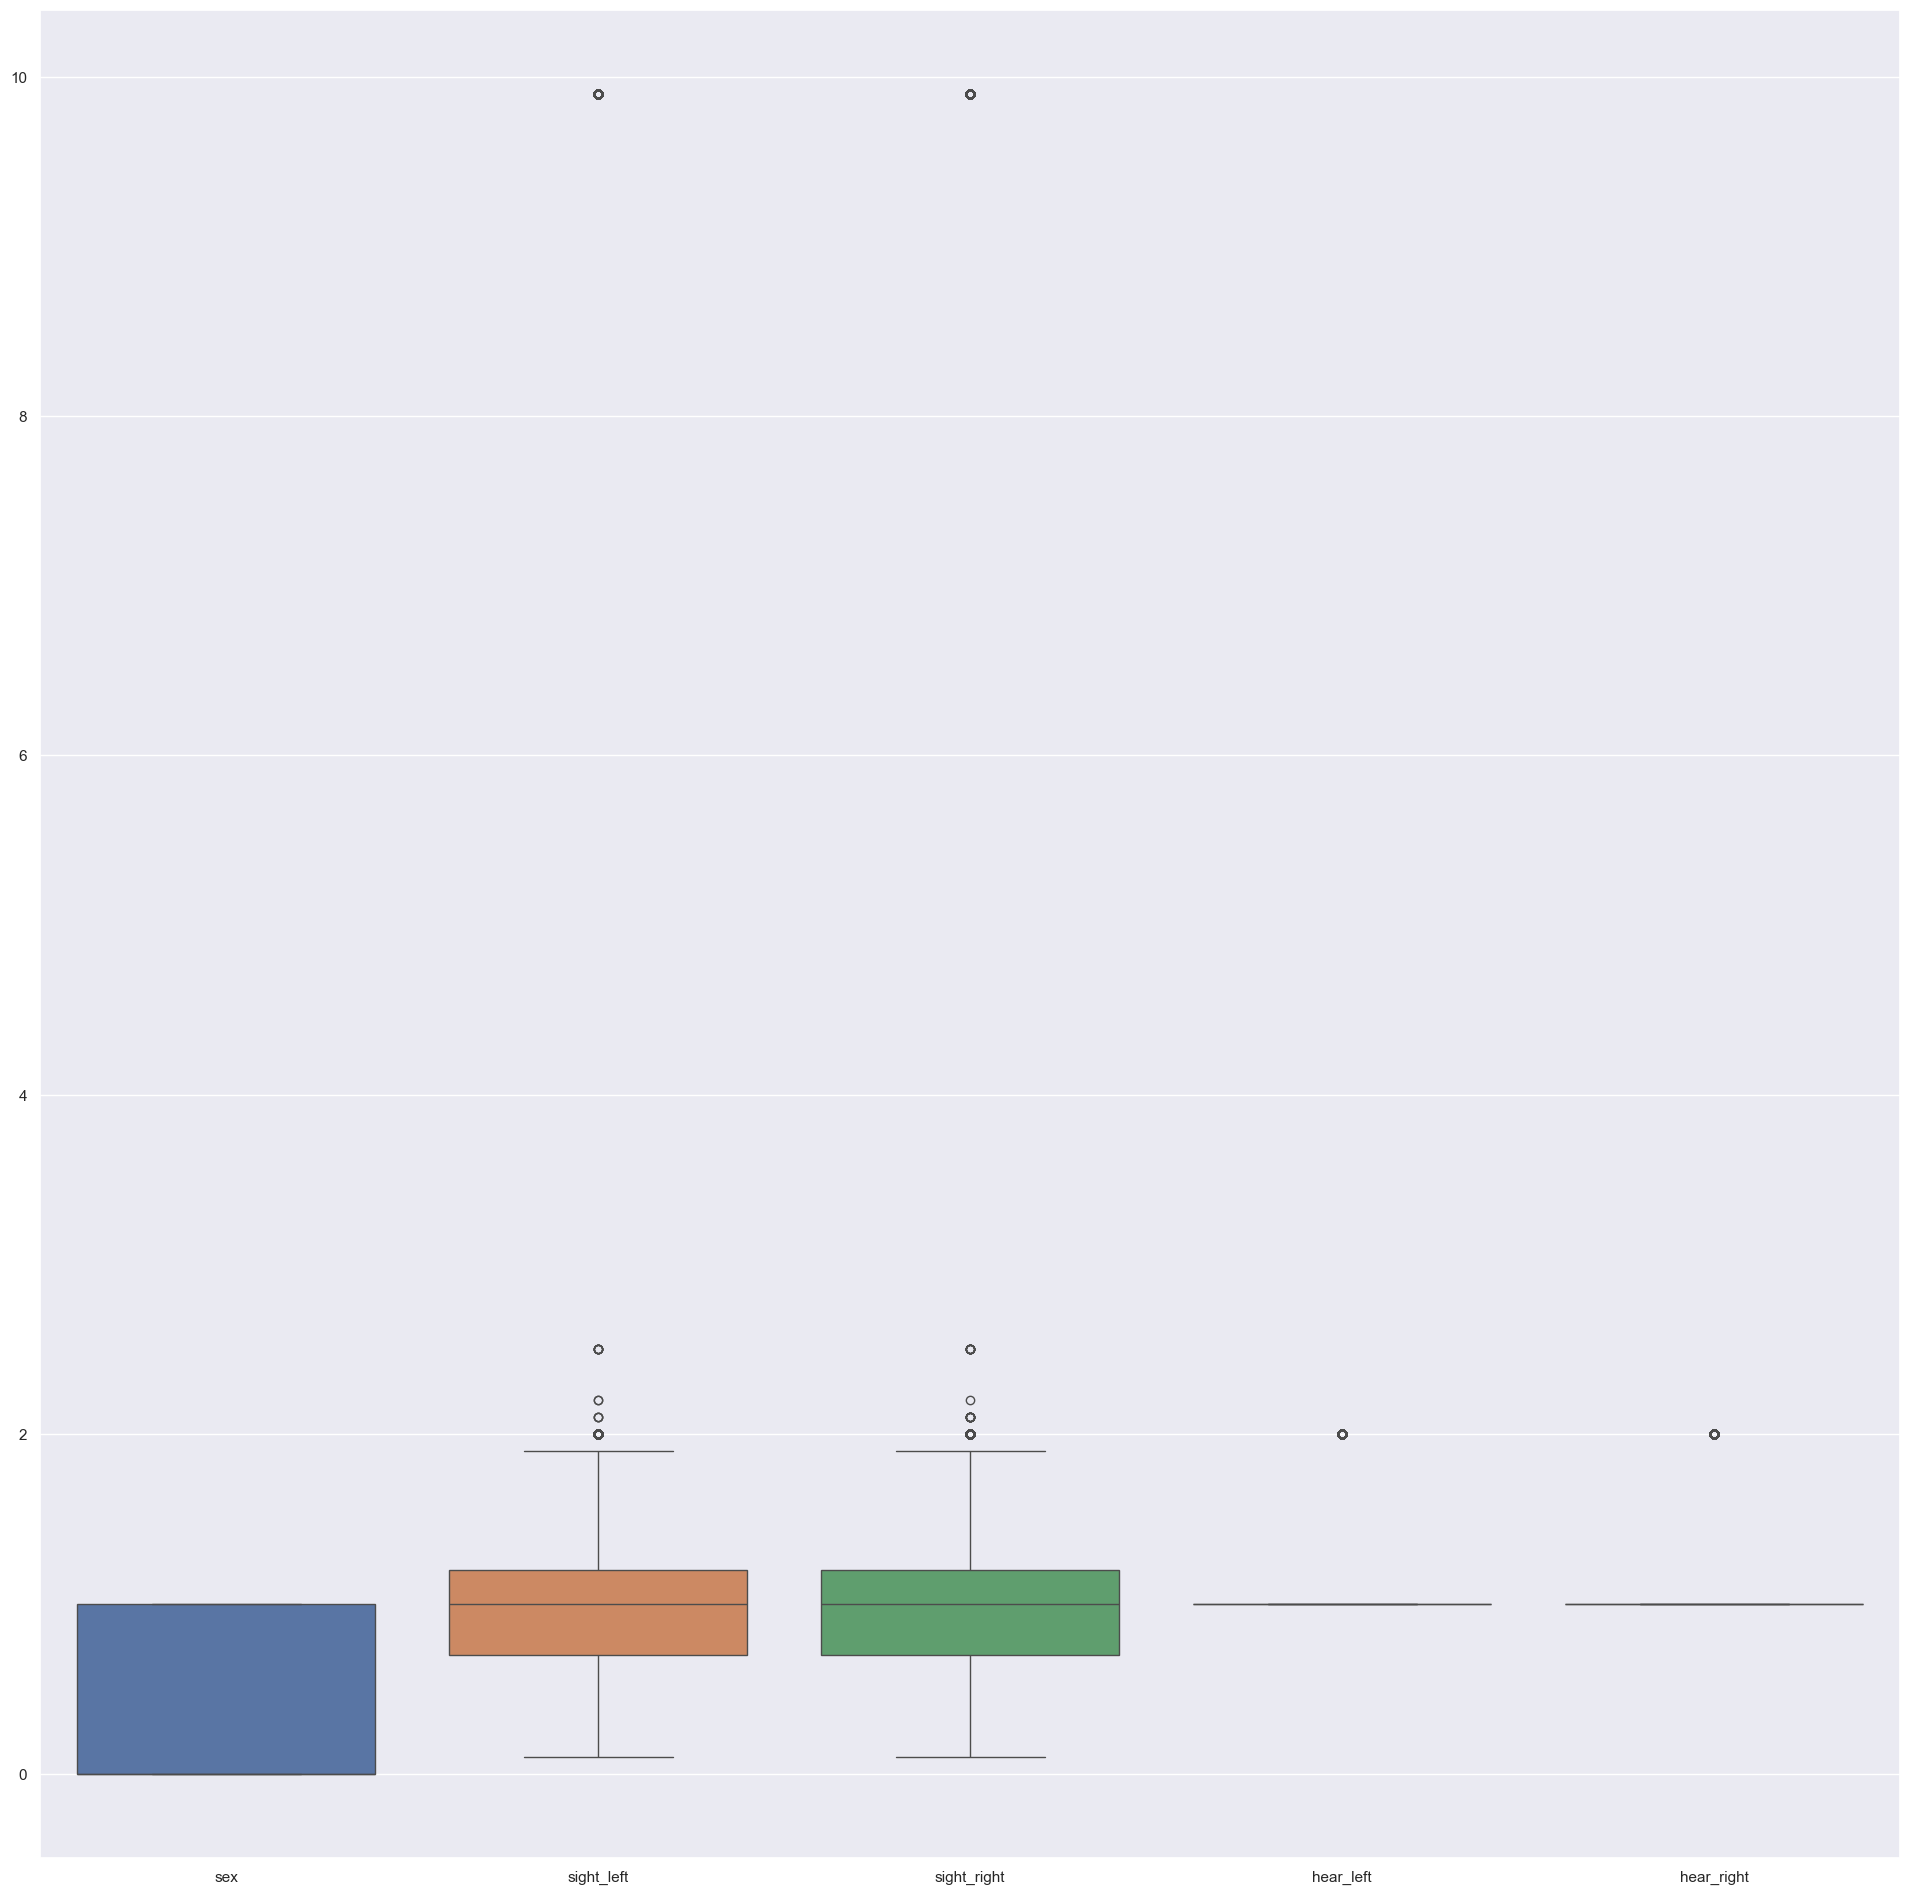

In [54]:
# Fit and transform the categorical data, sex	age	height	waistline	sight_left	sight_right	hear_left	hear_right	SBP	DBP	BLDS	tot_chole	HDL_chole	LDL_chole	urine_protein	serum_creatinine	SGOT_AST	SGOT_ALT	gamma_GTP
sns.boxplot(data=df[['sex','sight_left', 'sight_right', 'hear_left', 'hear_right' ]])
plt.show()

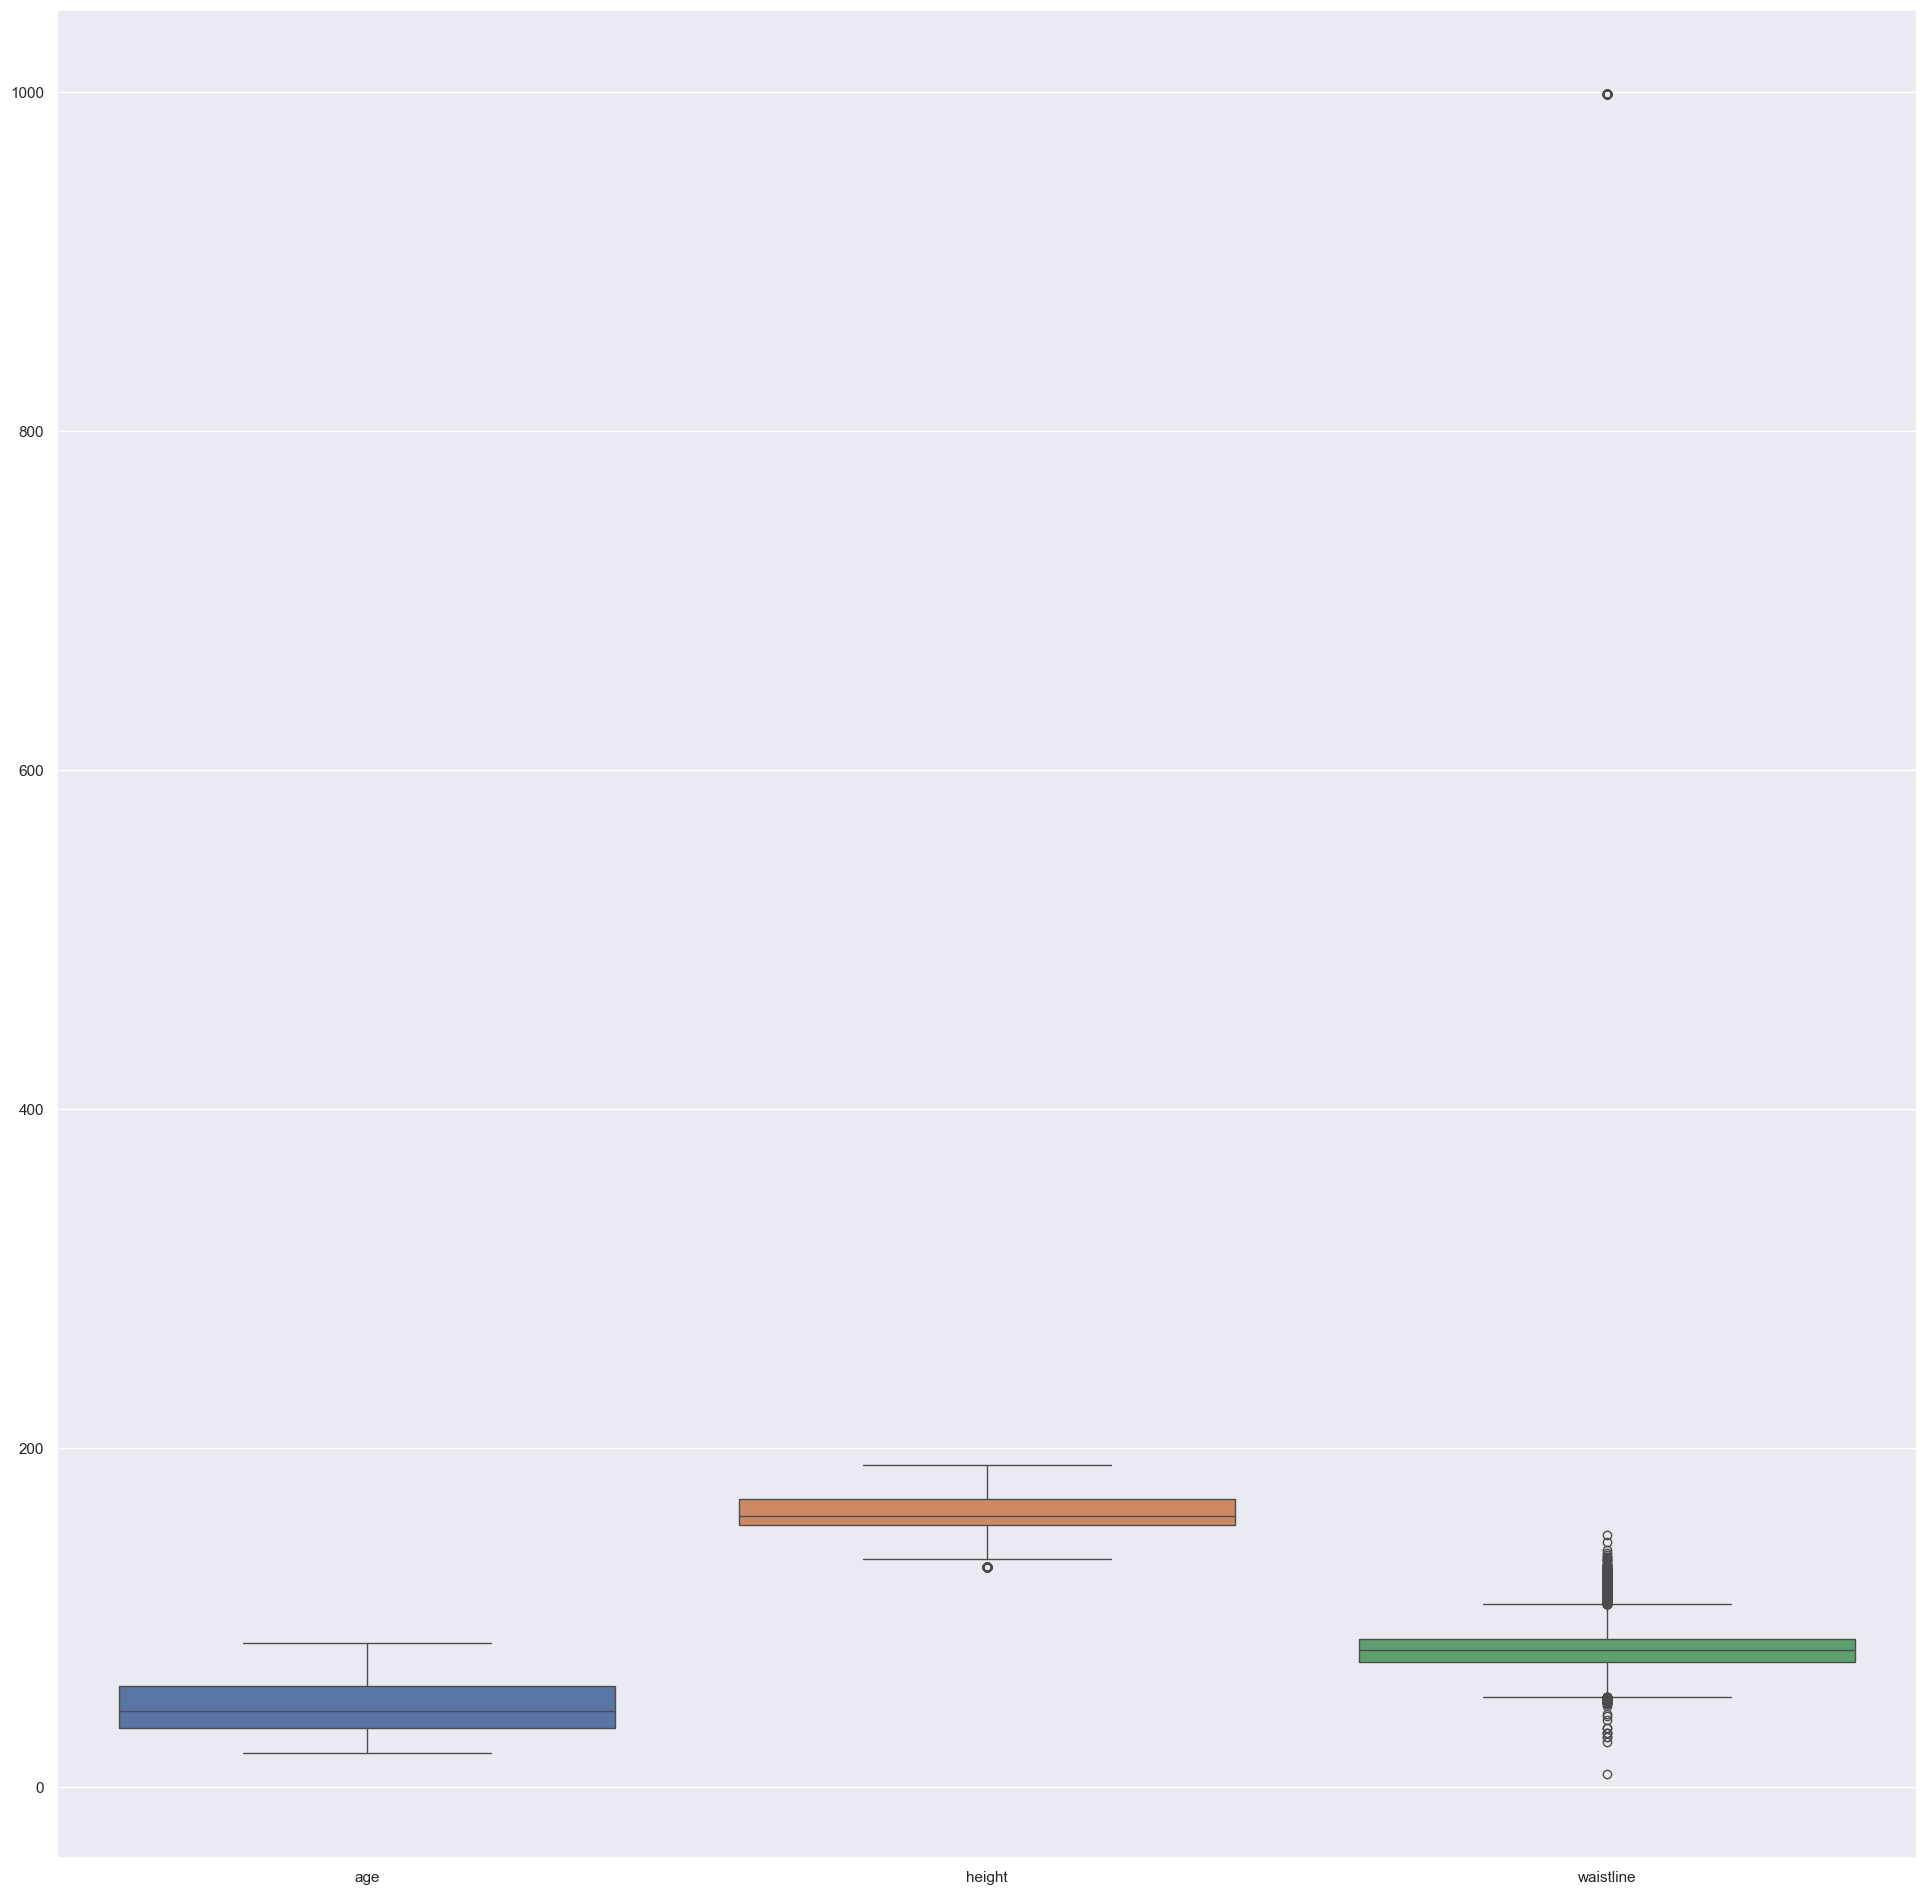

In [55]:
# Fit and transform the categorical data, sex	age	height	waistline	sight_left	sight_right	hear_left	hear_right	SBP	DBP	BLDS	tot_chole	HDL_chole	LDL_chole	urine_protein	serum_creatinine	SGOT_AST	SGOT_ALT	gamma_GTP
sns.boxplot(data=df[['age','height','waistline']])
plt.show()

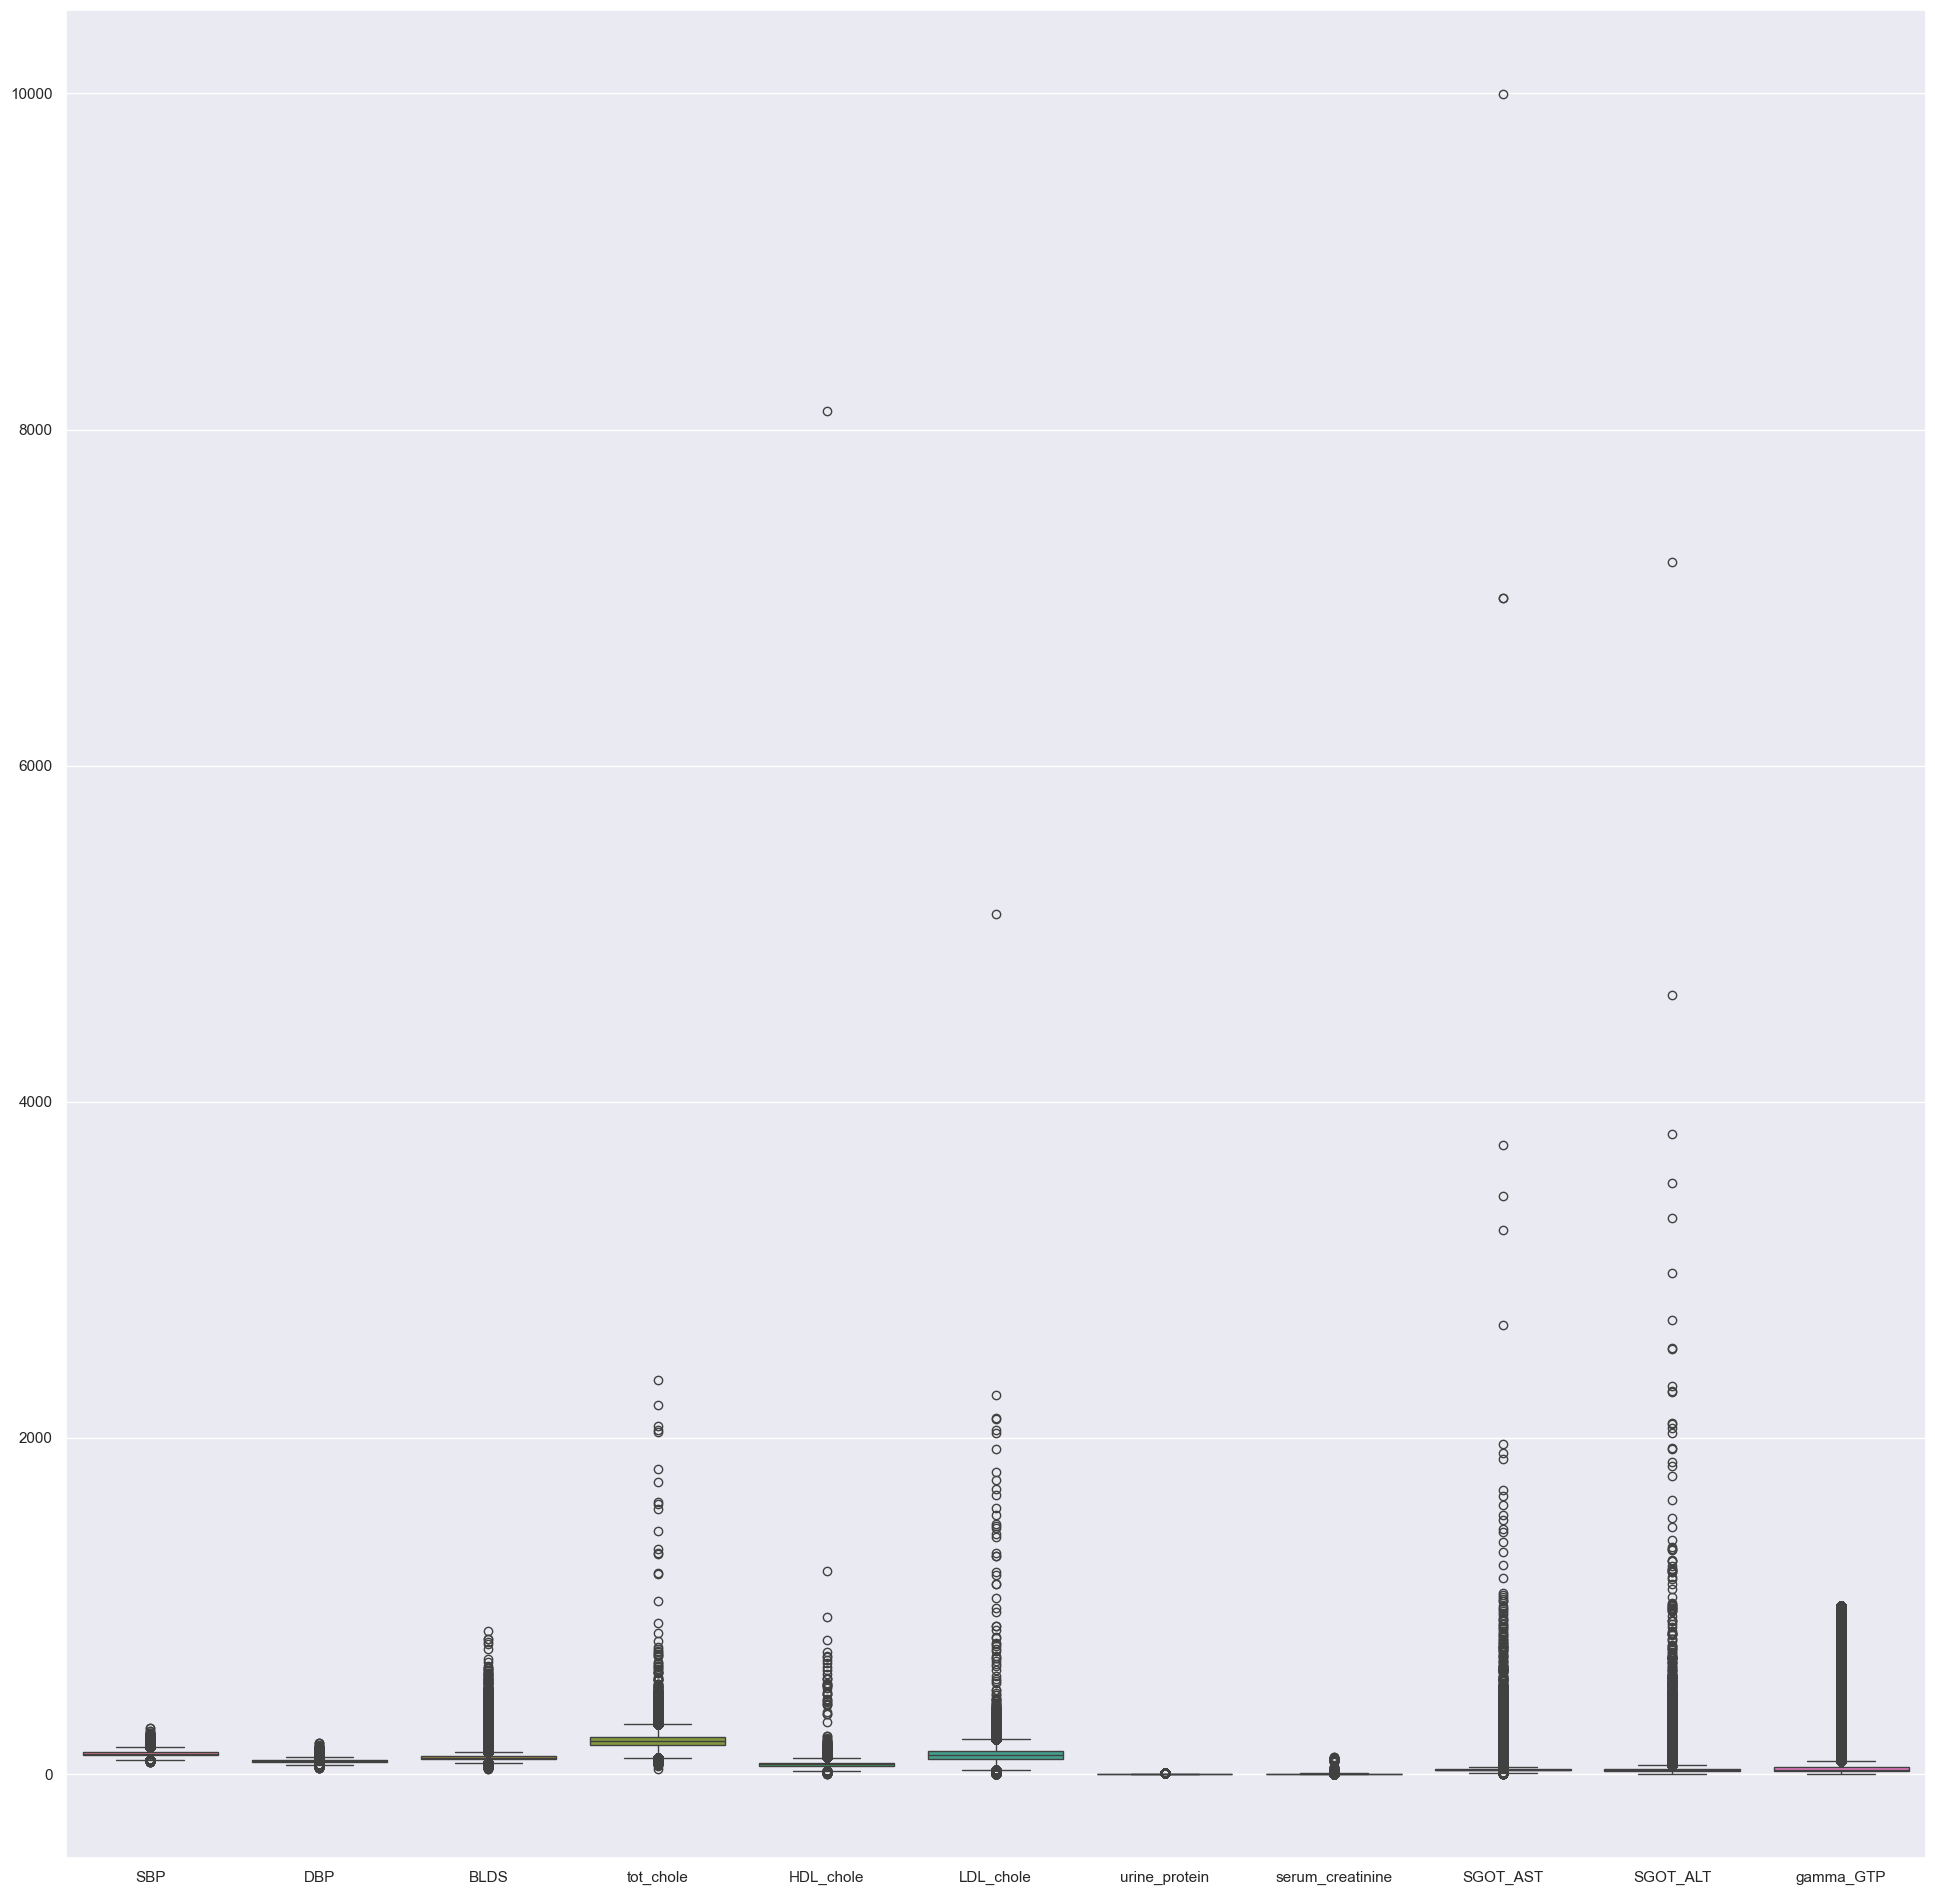

In [56]:
# Fit and transform the categorical data, sex	age	height	waistline	sight_left	sight_right	hear_left	hear_right	SBP	DBP	BLDS	tot_chole	HDL_chole	LDL_chole	urine_protein	serum_creatinine	SGOT_AST	SGOT_ALT	gamma_GTP
sns.boxplot(data=df[['SBP',	'DBP',	'BLDS'	,'tot_chole','HDL_chole','LDL_chole',	'urine_protein'	,'serum_creatinine'	,'SGOT_AST',	'SGOT_ALT'	,'gamma_GTP' ]])
plt.show()

<Figure size 1200x800 with 0 Axes>

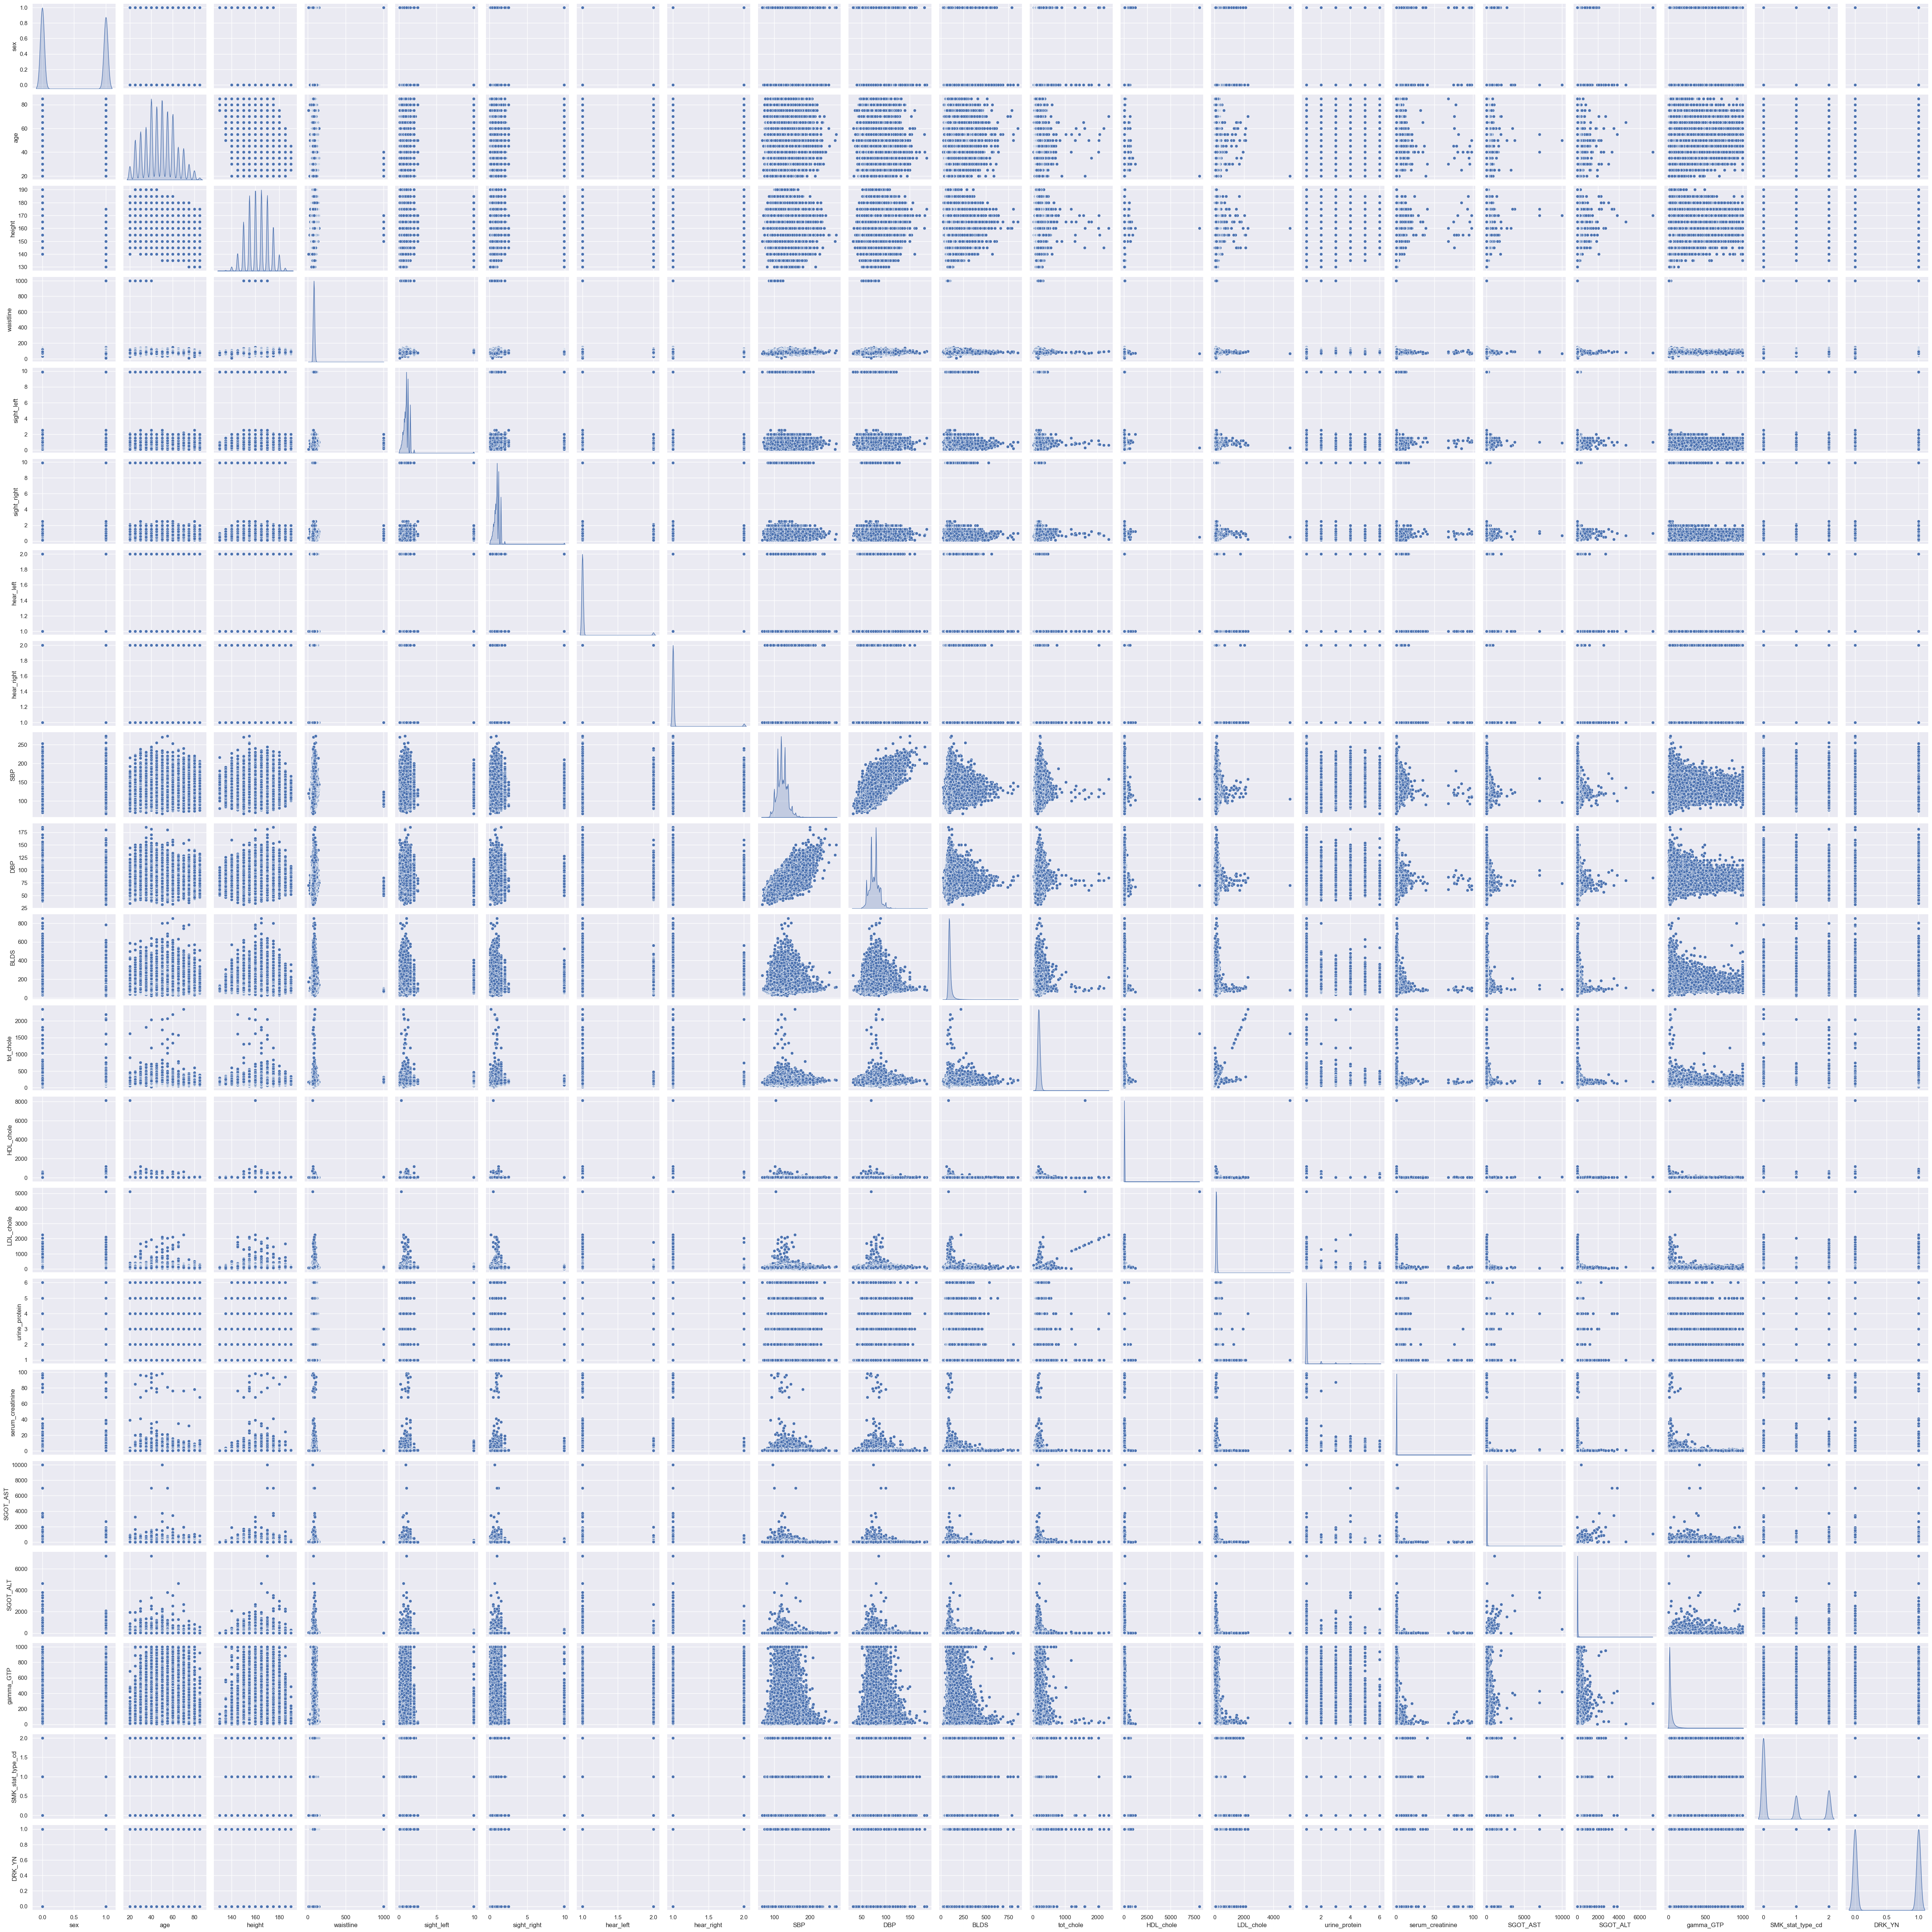

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.pairplot(data=df, diag_kind="kde")
plt.show()

## Handling Outliers 

In [70]:
df.head()

sex  age  height  waistline  sight_left  sight_right  hear_left  \
0    0   35     170       90.0         1.0          1.0        1.0   
1    0   30     180       89.0         0.9          1.2        1.0   
2    0   40     165       91.0         1.2          1.5        1.0   
3    0   50     175       91.0         1.5          1.2        1.0   
4    0   50     165       80.0         1.0          1.2        1.0   

   hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  LDL_chole  \
0         1.0  120.0  80.0   99.0      193.0       48.0      126.0   
1         1.0  130.0  82.0  106.0      228.0       55.0      148.0   
2         1.0  120.0  70.0   98.0      136.0       41.0       74.0   
3         1.0  145.0  87.0   95.0      201.0       76.0      104.0   
4         1.0  138.0  82.0  101.0      199.0       61.0      117.0   

   urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  \
0            1.0               1.0      21.0      35.0       40.0   
1            1.0               0.9      20.0      36.0       27.0   
2            1.0               0.9      47.0      32.0       68.0   
3            1.0               1.1      29.0      34.0       18.0   
4            1.0               0.8      19.0      12.0       25.0   

   SMK_stat_type_cd  DRK_YN  
0                 0       1  
1                 2       0  
2                 0       0  
3                 0       0  
4                 0       0

In [74]:
df.describe().T

count        mean        std    min    25%    50%    75%  \
sex               991320.0    0.468992   0.499038    0.0    0.0    0.0    1.0   
age               991320.0   47.614529  14.181346   20.0   35.0   45.0   60.0   
height            991320.0  162.240563   9.282922  130.0  155.0  160.0  170.0   
waistline         991320.0   81.233255  11.850296    8.0   74.1   81.0   87.8   
sight_left        991320.0    0.980833   0.605954    0.1    0.7    1.0    1.2   
sight_right       991320.0    0.978428   0.604779    0.1    0.7    1.0    1.2   
hear_left         991320.0    1.031495   0.174652    1.0    1.0    1.0    1.0   
hear_right        991320.0    1.030476   0.171892    1.0    1.0    1.0    1.0   
SBP               991320.0  122.432360  14.543083   67.0  112.0  120.0  131.0   
DBP               991320.0   76.052549   9.889334   32.0   70.0   76.0   82.0   
BLDS              991320.0  100.424305  24.179852   25.0   88.0   96.0  105.0   
tot_chole         991320.0  195.556769  38.660092   30.0  169.0  193.0  219.0   
HDL_chole         991320.0   56.936984  17.238578    1.0   46.0   55.0   66.0   
LDL_chole         991320.0  113.037429  35.842938    1.0   89.0  111.0  135.0   
urine_protein     991320.0    1.094221   0.437719    1.0    1.0    1.0    1.0   
serum_creatinine  991320.0    0.860467   0.480536    0.1    0.7    0.8    1.0   
SGOT_AST          991320.0   25.989424  23.493668    1.0   19.0   23.0   28.0   
SGOT_ALT          991320.0   25.755148  26.308910    1.0   15.0   20.0   29.0   
gamma_GTP         991320.0   37.136152  50.423811    1.0   16.0   23.0   39.0   
SMK_stat_type_cd  991320.0    0.608112   0.818504    0.0    0.0    0.0    1.0   
DRK_YN            991320.0    0.499814   0.500000    0.0    0.0    0.0    1.0   

                     max  
sex                  1.0  
age                 85.0  
height             190.0  
waistline          999.0  
sight_left           9.9  
sight_right          9.9  
hear_left            2.0  
hear_right           2.0  
SBP                273.0  
DBP                185.0  
BLDS               852.0  
tot_chole         2344.0  
HDL_chole         8110.0  
LDL_chole         5119.0  
urine_protein        6.0  
serum_creatinine    98.0  
SGOT_AST          9999.0  
SGOT_ALT          7210.0  
gamma_GTP          999.0  
SMK_stat_type_cd     2.0  
DRK_YN               1.0

In [62]:
df.nunique()

sex                   2
age                  14
height               13
waistline           737
sight_left           24
sight_right          24
hear_left             2
hear_right            2
SBP                 171
DBP                 127
BLDS                498
tot_chole           474
HDL_chole           223
LDL_chole           432
urine_protein         6
serum_creatinine    183
SGOT_AST            568
SGOT_ALT            594
gamma_GTP           940
SMK_stat_type_cd      3
DRK_YN                2
dtype: int64

In [63]:
from sklearn.preprocessing import MinMaxScaler
smaller_dataset = df.sample(n=20000, random_state=42)

columns_to_scale = smaller_dataset.columns.difference(["DRK_YN", "SMK_stat_type_cd"])

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(smaller_dataset[columns_to_scale])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

scaled_dataset = smaller_dataset.copy()
scaled_dataset = scaled_dataset.reset_index(drop=True)  
scaled_dataset[columns_to_scale] = scaled_df

In [64]:
scaled_dataset.head()

sex       age    height  waistline  sight_left  sight_right  hear_left  \
0  0.0  0.384615  0.583333   0.042194    0.081633     0.142857        0.0   
1  0.0  0.846154  0.583333   0.035865    0.051020     0.061224        0.0   
2  0.0  0.230769  0.583333   0.026371    0.112245     0.112245        0.0   
3  1.0  0.615385  0.250000   0.030591    0.051020     0.081633        0.0   
4  1.0  0.538462  0.416667   0.009494    0.142857     0.091837        0.0   

   hear_right       SBP       DBP      BLDS  tot_chole  HDL_chole  LDL_chole  \
0         0.0  0.446809  0.554545  0.177011   0.133835   0.130058   0.040989   
1         0.0  0.638298  0.363636  0.190805   0.087218   0.078035   0.025316   
2         0.0  0.418440  0.381818  0.174713   0.230075   0.132948   0.082580   
3         0.0  0.290780  0.281818  0.163218   0.154887   0.104046   0.040989   
4         0.0  0.177305  0.181818  0.154023   0.183459   0.127168   0.065702   

   urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  \
0            0.0          0.053030  0.015439  0.009824   0.058175   
1            0.0          0.053030  0.006532  0.007756   0.021063   
2            0.0          0.060606  0.008907  0.009307   0.031093   
3            0.8          0.090909  0.011283  0.005688   0.011033   
4            0.0          0.060606  0.008314  0.005688   0.012036   

   SMK_stat_type_cd  DRK_YN  
0                 2       1  
1                 0       0  
2                 2       1  
3                 0       0  
4                 0       0

In [65]:
def plot_confusion_matrix(y_true, y_pred, class_names, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Model: Confusion Matrix')
    plt.show()

def plot_classification_report(y_true, y_pred, class_names, model_name):
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(8, 6))
    sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap='Blues', fmt='.2f')
    plt.xlabel('Metrics')
    plt.ylabel('Class')
    plt.title(f'{model_name} Model: Classification Report')
    plt.show()

def plot_roc_curve(y_true, y_prob, model_name):
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} Model (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Model: Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [66]:
X = scaled_dataset.drop(["DRK_YN", "SMK_stat_type_cd"], axis=1)
y = scaled_dataset["DRK_YN"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drinking Model

In [67]:

# Create instances of the classifiers
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(n_jobs=-1)
knn_classifier = KNeighborsClassifier()
mlp_classifier = MLPClassifier()
svm_classifier = SVC(probability=True)

# Define parameter grids for each classifier
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a dictionary of classifiers and their corresponding parameter grids
classifiers = {
    'DecisionTreeClassifier': (dt_classifier, param_grid_dt),
    'RandomForestClassifier': (rf_classifier, param_grid_rf),
    'KNeighborsClassifier': (knn_classifier, param_grid_knn),
    'NeuralNetworkClassifier': (mlp_classifier, param_grid_mlp),
    'SupportVectorMachine': (svm_classifier, param_grid_svm),
}

classification_models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=100),
    'NeuralNetworkClassifier': MLPClassifier(),
    'SupportVectorMachine': SVC(),
}

for name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)  # Assuming you have training data (X_train, y_train)
    
    # Update the classifier in the original dictionary with the best parameters
    classification_models[name] = grid_search.best_estimator_
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_}")


def train_and_evaluate_models_drinking(models, X_train, X_test, y_train, y_test, confusion_plot=False, classification_plot= False,roc_plot=False):
    results = {}

    for model_name in models.items():

        model = models[model_name]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        if roc_plot:
            plot_roc_curve(y_test, y_pred, model_name)
        if classification_plot:
            plot_classification_report(y_test, y_pred, ["Yes", "No"] ,model_name)
        if confusion_plot:
            plot_confusion_matrix(y_test, y_pred, ["Yes", "No"],model_name)


        auc_roc = roc_auc_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)


        results[model_name] = {
            'ROC AUC': auc_roc,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': conf_matrix,
        }

        print(f"Model: {model_name}")
        print(f"ROC AUC: {auc_roc}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"Confusion Matrix: \n{conf_matrix}\n")

    return results

new_results = train_and_evaluate_models_drinking(
    classification_models, X_train, X_test, y_train, y_test,
    roc_plot=True ,classification_plot=False ,confusion_plot=False)

Best parameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 10}
Best cross-validation score for DecisionTreeClassifier: 0.6890000000000001
Best parameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 200}
Best cross-validation score for RandomForestClassifier: 0.72325
Best parameters for KNeighborsClassifier: {'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation score for KNeighborsClassifier: 0.6735625


/Users/Marshalikorawung/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Marshalikorawung/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Marshalikorawung/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Marshalikorawung/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

Best parameters for NeuralNetworkClassifier: {'alpha': 0.001, 'hidden_layer_sizes': (100,)}
Best cross-validation score for NeuralNetworkClassifier: 0.7248750000000002


KeyboardInterrupt: 

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a Voting Classifier with the individual models
drinking_model = VotingClassifier(estimators=[
    ('DecisionTreeClassifier', classification_models['DecisionTreeClassifier']),
    ('RandomForestClassifier', classification_models['RandomForestClassifier']),
    ('KNeighborsClassifier', classification_models['KNeighborsClassifier']),
    ('NeuralNetworkClassifier', classification_models['NeuralNetworkClassifier']),
    ('SupportVectorMachine', classification_models['SupportVectorMachine']),  # Enable probability estimation
], voting="soft")

# Fit the ensemble model
drinking_model.fit(X_train, y_train)

# Obtain probability predictions
drinking_predictions_proba = drinking_model.predict_proba(X_test)[:, 1]

# Obtain class predictions
drinking_predictions = drinking_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, drinking_predictions)
precision = precision_score(y_test, drinking_predictions)
recall = recall_score(y_test, drinking_predictions)
f1 = f1_score(y_test, drinking_predictions)
roc_auc = roc_auc_score(y_test, drinking_predictions_proba)

# Print performance metrics
print("Drinking Prediction Model Performance")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")



Drinking Prediction Model Performance
Accuracy: 0.71
Precision: 0.70
Recall: 0.75
F1-Score: 0.72
ROC AUC: 0.80


## Smoking Model

In [ ]:
X = scaled_dataset.drop(["DRK_YN", "SMK_stat_type_cd"], axis=1)
y = scaled_dataset["SMK_stat_type_cd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc_curve(y_true, y_prob, model_name, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true, y_prob[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(8, 6))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')


    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

Best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 10}
Best cross-validation score for DecisionTreeClassifier: 0.6588125
Best parameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 200}
Best cross-validation score for RandomForestClassifier: 0.6883125
Best parameters for KNeighborsClassifier: {'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score for KNeighborsClassifier: 0.6505000000000001
Best parameters for NeuralNetworkClassifier: {'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
Best cross-validation score for NeuralNetworkClassifier: 0.6922499999999999
Best parameters for SupportVectorMachine: {'C': 1, 'kernel': 'rbf'}
Best cross-validation score for SupportVectorMachine: 0.6888124999999999


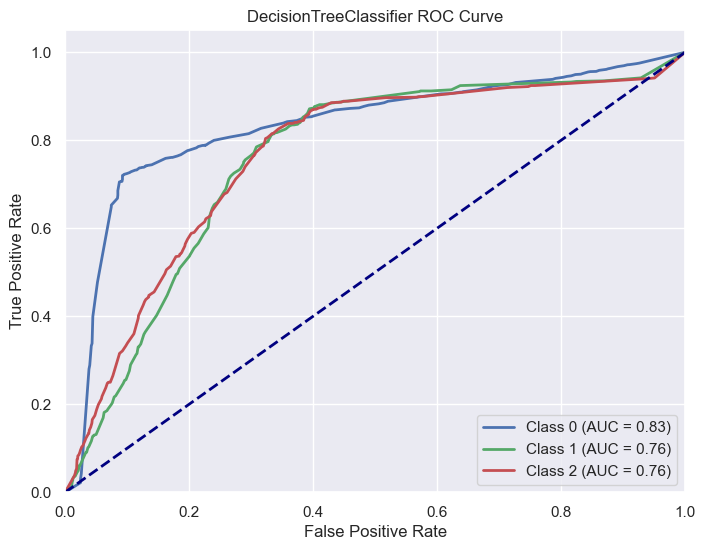

Model: DecisionTreeClassifier
ROC AUC: 0.7840404272133012
Accuracy: 0.65425
Precision: 0.647141636595549
Recall: 0.65425
F1 Score: 0.6500419196615471



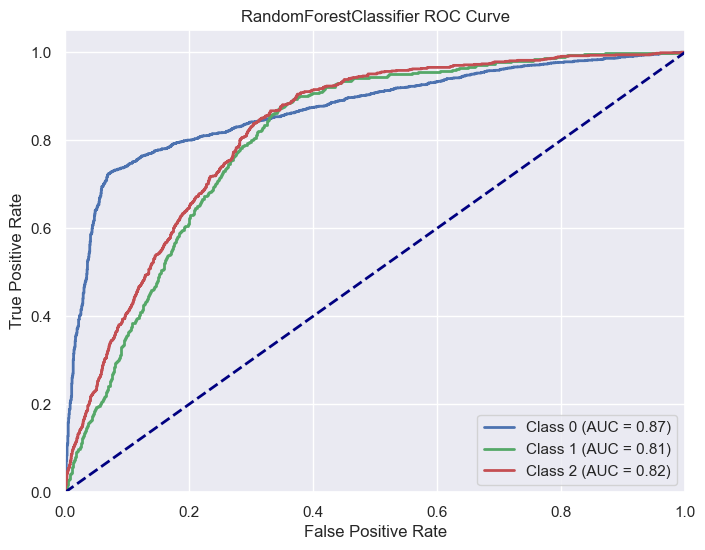

Model: RandomForestClassifier
ROC AUC: 0.8337717534629158
Accuracy: 0.677
Precision: 0.6772077634851453
Recall: 0.677
F1 Score: 0.6737113476591874



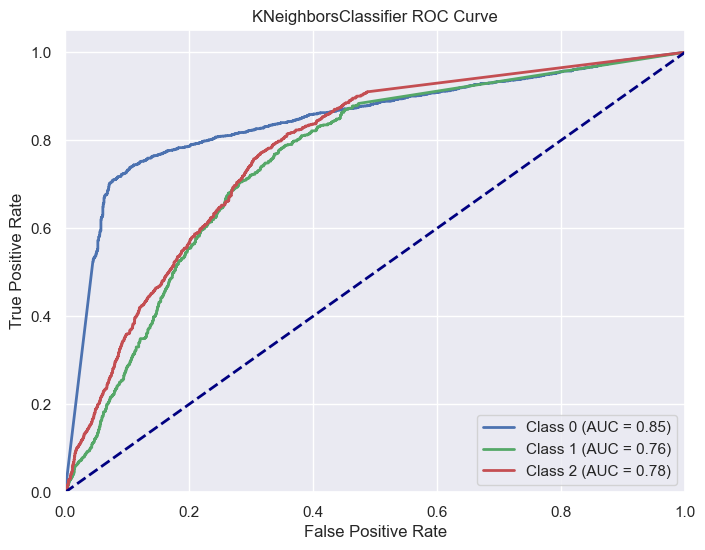

Model: KNeighborsClassifier
ROC AUC: 0.7939532679859375
Accuracy: 0.659
Precision: 0.65081295747359
Recall: 0.659
F1 Score: 0.6543363567551832



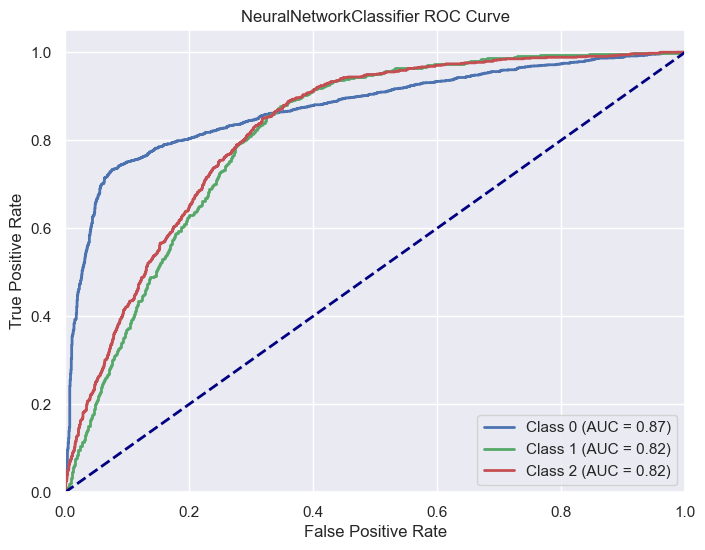

Model: NeuralNetworkClassifier
ROC AUC: 0.8384504630576269
Accuracy: 0.68675
Precision: 0.702941641119496
Recall: 0.68675
F1 Score: 0.6934799410544185



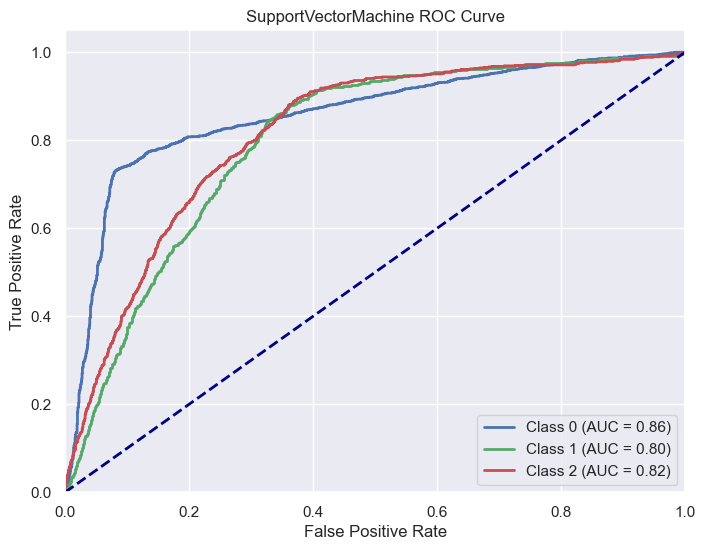

Model: SupportVectorMachine
ROC AUC: 0.8248071575785101
Accuracy: 0.689
Precision: 0.7051870239898337
Recall: 0.689
F1 Score: 0.693608815823021



In [ ]:

# Create instances of the classifiers
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(n_jobs=-1)
knn_classifier = KNeighborsClassifier()
mlp_classifier = MLPClassifier()
svm_classifier = SVC(probability=True)

# Define parameter grids for each classifier
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a dictionary of classifiers and their corresponding parameter grids
classifiers = {
    'DecisionTreeClassifier': (dt_classifier, param_grid_dt),
    'RandomForestClassifier': (rf_classifier, param_grid_rf),
    'KNeighborsClassifier': (knn_classifier, param_grid_knn),
    'NeuralNetworkClassifier': (mlp_classifier, param_grid_mlp),
    'SupportVectorMachine': (svm_classifier, param_grid_svm),
}

classification_models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=100),
    'NeuralNetworkClassifier': MLPClassifier(),
    'SupportVectorMachine': SVC(),
}

for name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)  # Assuming you have training data (X_train, y_train)
    
    # Update the classifier in the original dictionary with the best parameters
    classification_models[name] = grid_search.best_estimator_
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_}")


def train_and_evaluate_models_smoking(models, X_train, X_test, y_train, y_test, roc_plot=False):
    results = {}

    for model_name, in models.items():

        model = models[model_name]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)


        if roc_plot:
            plot_multiclass_roc_curve(y_test, model.predict_proba(X_test), model_name, 3)


        auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify 'weighted' averaging
        recall = recall_score(y_test, y_pred, average='weighted')  # Specify 'weighted' averaging
        f1 = f1_score(y_test, y_pred, average='weighted')


        results[model_name] = {
            'ROC AUC': auc_roc,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,

        }

        print(f"Model: {model_name}")
        print(f"ROC AUC: {auc_roc}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}\n")

    return results

new_results = train_and_evaluate_models_smoking(
    classification_models, X_train, X_test, y_train, y_test,
    roc_plot=True)

In [ ]:
from sklearn.preprocessing import label_binarize

# Create a Voting Classifier with the individual models
smoking_model = VotingClassifier(estimators=[
    ('DecisionTreeClassifier', classification_models['DecisionTreeClassifier']),
    ('RandomForestClassifier', classification_models['RandomForestClassifier']),
    ('KNeighborsClassifier', classification_models['KNeighborsClassifier']),
    ('NeuralNetworkClassifier', classification_models['NeuralNetworkClassifier']),
    ('SupportVectorMachine', classification_models['SupportVectorMachine']),
], voting="soft")  # You can use "hard" or "soft" voting

# Assuming you have training and testing data (X_train, y_train, X_test, y_test)

smoking_model.fit(X_train, y_train)

smoking_predictions = smoking_model.predict(X_test)
smoking_predictions_v2 = smoking_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, smoking_predictions)

precision = precision_score(y_test, smoking_predictions, average='weighted')

recall = recall_score(y_test, smoking_predictions, average='weighted')

f1 = f1_score(y_test, smoking_predictions, average='weighted')

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, smoking_predictions_v2, average='macro')

print("Smoking Prediction Model Performance")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Smoking Prediction Model Performance
Accuracy: 0.69
Precision: 0.68
Recall: 0.69
F1-Score: 0.68
ROC AUC: 0.84


In [ ]:
expected_feature_names = [
    'sex', 'age', 'height', 'waistline', 'sight_left', 'sight_right',
    'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
    'LDL_chole', 'urine_protein', 'serum_creatinine',
    'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'
]

my_record = X_test.sample(n=1)[expected_feature_names]

print(my_record)

import json
json_data = my_record.to_json(orient='records', lines=True)
parsed_data = json.loads(json_data)
pretty_json = json.dumps(parsed_data, indent=4)
print(f"For input:\n{pretty_json}\n")

drinking_prediction = drinking_model.predict(my_record)
predicted_class_drinking = drinking_prediction[0]
print(f"DRK_YN (1 for Yes / 0 for No):\nPrediction: {predicted_class_drinking}\n")

smoking_prediction = smoking_model.predict(my_record)
predicted_class_smoking = smoking_model.classes_[smoking_prediction[0]]
print(f"SMK_stat_type_cd (Smoking Status 0 for Never Smoked) / 1 for Used to Smoke / 2 for Still Smoking)):\nPrediction: {predicted_class_smoking}")

       sex       age    height  waistline  sight_left  sight_right  hear_left  \
15342  0.0  0.692308  0.333333   0.429293    0.315789     0.315789        0.0   

       hear_right       SBP       DBP      BLDS  tot_chole  HDL_chole  \
15342         0.0  0.353846  0.354167  0.353591    0.37766   0.384615   

       LDL_chole  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
15342   0.377246            0.0               0.3  0.212291  0.092664   

       gamma_GTP  
15342   0.089249  
For input:
{
    "sex": 0.0,
    "age": 0.6923076923,
    "height": 0.3333333333,
    "waistline": 0.4292929293,
    "sight_left": 0.3157894737,
    "sight_right": 0.3157894737,
    "hear_left": 0.0,
    "hear_right": 0.0,
    "SBP": 0.3538461538,
    "DBP": 0.3541666667,
    "BLDS": 0.3535911602,
    "tot_chole": 0.3776595745,
    "HDL_chole": 0.3846153846,
    "LDL_chole": 0.377245509,
    "urine_protein": 0.0,
    "serum_creatinine": 0.3,
    "SGOT_AST": 0.2122905028,
    "SGOT_ALT": 0.0926640927,

## Feature Relevance

### Drinking Feature Relevance

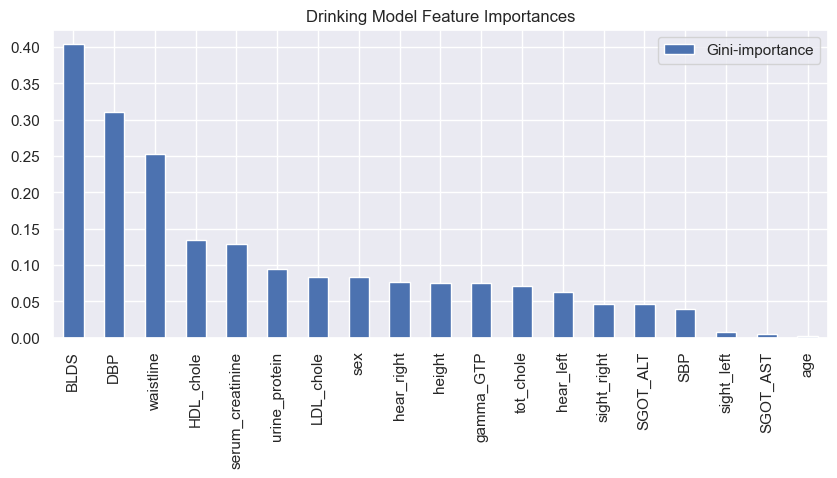

In [ ]:
feats = {}

# Access and collect feature importances for each individual classifier
for clf_name, clf in drinking_model.named_estimators_.items():
    if hasattr(clf, 'feature_importances_'):
        for feature, importance in zip(df.columns.difference(["DRK_YN", "SMK_stat_type_cd"]), clf.feature_importances_):
            if feature in feats:
                feats[feature] += importance
            else:
                feats[feature] = importance

                
                
importances = pd.DataFrame.from_dict(feats, orient='index', columns=['Gini-importance'])

importances = importances.sort_values(by='Gini-importance', ascending=False)
importances.plot(kind='bar', rot=90, figsize=(10, 4))
plt.title('Drinking Model Feature Importances')
plt.show()


### Smoking Feature Relevance

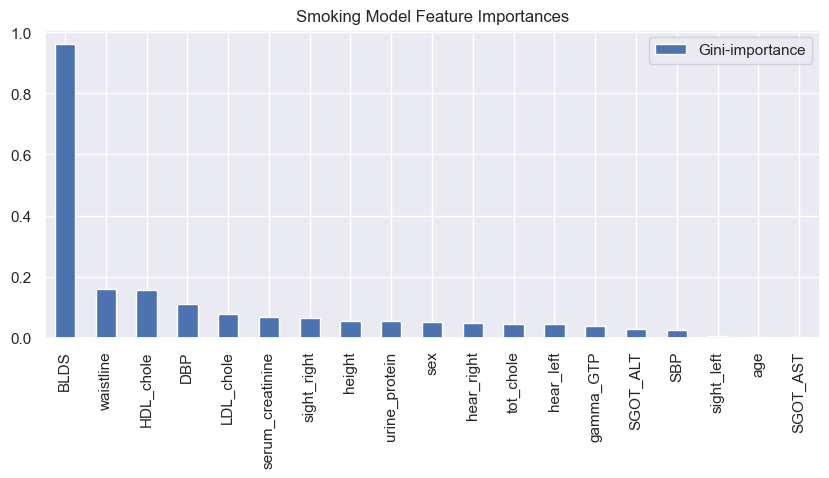

In [ ]:
feats = {}

# Access and collect feature importances for each individual classifier
for clf_name, clf in smoking_model.named_estimators_.items():
    if hasattr(clf, 'feature_importances_'):
        for feature, importance in zip(df.columns.difference(["DRK_YN", "SMK_stat_type_cd"]), clf.feature_importances_):
            if feature in feats:
                feats[feature] += importance
            else:
                feats[feature] = importance
             
importances = pd.DataFrame.from_dict(feats, orient='index', columns=['Gini-importance'])

importances = importances.sort_values(by='Gini-importance', ascending=False)
importances.plot(kind='bar', rot=90, figsize=(10, 4))
plt.title('Smoking Model Feature Importances')
plt.show()

In [ ]:
import joblib

In [ ]:
# Save the drinking_model
joblib.dump(drinking_model, 'drinking_model.joblib')

# Save the smoking_model
joblib.dump(smoking_model, 'smoking_model.joblib')

['smoking_model.joblib']

In [ ]:
# Load the drinking_model
loaded_drinking_model = joblib.load('drinking_model.joblib')

# Load the smoking_model
loaded_smoking_model = joblib.load('smoking_model.joblib')

In [ ]:
drinking_prediction = loaded_drinking_model.predict(my_record)
predicted_class_drinking = drinking_prediction[0]
print(f"DRK_YN (1 for Yes / 0 for No):\nPrediction: {predicted_class_drinking}\n")

smoking_prediction = loaded_smoking_model.predict(my_record)
predicted_class_smoking = smoking_model.classes_[smoking_prediction[0]]
print(f"SMK_stat_type_cd (Smoking Status 0 for Never Smoked) / 1 for Used to Smoke / 2 for Still Smoking)):\nPrediction: {predicted_class_smoking}")


DRK_YN (1 for Yes / 0 for No):
Prediction: 0

SMK_stat_type_cd (Smoking Status 0 for Never Smoked) / 1 for Used to Smoke / 2 for Still Smoking)):
Prediction: 0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Recreate a similar model in Keras
input_dim = X_train.shape[1]
output_dim = len(np.unique(y_train))

keras_model = Sequential([
    Dense(10, input_shape=(input_dim,), activation='relu'),
    Dense(output_dim, activation='softmax')
])

In [ ]:
for name, clf in drinking_model.named_estimators_.items():
    if name == 'NeuralNetworkClassifier':
        # For NeuralNetworkClassifier
        # Assuming the first layer has 10 units and the input_dim is 27
        keras_model.layers[0].set_weights([clf.coefs_[0][:, :10], np.zeros(10)])

keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
keras_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_acc = keras_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

keras_model.save('drinking_model_keras.h5')


Epoch 1/10
400/400 [==============================] - 1s 1ms/step - loss: 0.8589 - accuracy: 0.6087 - val_loss: 0.7247 - val_accuracy: 0.6484
Epoch 2/10
400/400 [==============================] - 0s 1ms/step - loss: 0.7017 - accuracy: 0.6623 - val_loss: 0.6831 - val_accuracy: 0.6669
Epoch 3/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.6662 - val_loss: 0.6797 - val_accuracy: 0.6712
Epoch 4/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.6655 - val_loss: 0.6763 - val_accuracy: 0.6750
Epoch 5/10
400/400 [==============================] - 0s 990us/step - loss: 0.6822 - accuracy: 0.6700 - val_loss: 0.6737 - val_accuracy: 0.6766
Epoch 6/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.6720 - val_loss: 0.6720 - val_accuracy: 0.6787
Epoch 7/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.6702 - val_loss: 0.6704 - val_accuracy: 0.6759
Epoc

c:\Users\AGIF\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
for name, clf in smoking_model.named_estimators_.items():
    if name == 'NeuralNetworkClassifier':
        # For NeuralNetworkClassifier
        # Assuming the first layer has 10 units and the input_dim is 27
        keras_model.layers[0].set_weights([clf.coefs_[0][:, :10], np.zeros(10)])

keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
keras_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_acc = keras_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

keras_model.save('smoking_model_keras.h5')

Epoch 1/10
400/400 [==============================] - 1s 1ms/step - loss: 0.8326 - accuracy: 0.6175 - val_loss: 0.7248 - val_accuracy: 0.6444
Epoch 2/10
400/400 [==============================] - 0s 1ms/step - loss: 0.7110 - accuracy: 0.6460 - val_loss: 0.6932 - val_accuracy: 0.6647
Epoch 3/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.6567 - val_loss: 0.6805 - val_accuracy: 0.6656
Epoch 4/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.6606 - val_loss: 0.6765 - val_accuracy: 0.6675
Epoch 5/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.6658 - val_loss: 0.6736 - val_accuracy: 0.6741
Epoch 6/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.6680 - val_loss: 0.6732 - val_accuracy: 0.6759
Epoch 7/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.6680 - val_loss: 0.6709 - val_accuracy: 0.6841
Epoch 

c:\Users\AGIF\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

loaded_model_drinking = load_model('drinking_model_keras.h5')
loaded_model_smoking = load_model('smoking_model_keras.h5')

In [ ]:
drinking_prediction = loaded_model_drinking.predict(my_record)
predicted_class_drinking = np.argmax(drinking_prediction)
print(f"DRK_YN (1 for Yes / 0 for No):\nPrediction: {predicted_class_drinking}\n")

smoking_prediction = loaded_smoking_model.predict(my_record)
predicted_class_smoking = np.argmax(smoking_prediction)
print(f"SMK_stat_type_cd (Smoking Status 0 for Never Smoked / 1 for Used to Smoke / 2 for Still Smoking)):\nPrediction: {predicted_class_smoking}")


1/1 [==============================] - 0s 123ms/step
DRK_YN (1 for Yes / 0 for No):
Prediction: 0

SMK_stat_type_cd (Smoking Status 0 for Never Smoked / 1 for Used to Smoke / 2 for Still Smoking)):
Prediction: 0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

keras_model = load_model('drinking_model_keras.h5')  # Replace 'my_model.h5' with the actual filename

converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

with open('drinking_model_tf.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\AGIF\AppData\Local\Temp\tmpw6_p58my\assets


INFO:tensorflow:Assets written to: C:\Users\AGIF\AppData\Local\Temp\tmpw6_p58my\assets


In [ ]:
keras_model_smoking = load_model('smoking_model_keras.h5')  # Replace 'my_model.h5' with the actual filename

converter_smoke = tf.lite.TFLiteConverter.from_keras_model(keras_model_smoking)
tflite_model_smoke = converter_smoke.convert()

with open('smoking_model_tf.tflite', 'wb') as f:
    f.write(tflite_model_smoke)

INFO:tensorflow:Assets written to: C:\Users\AGIF\AppData\Local\Temp\tmp08iww5sb\assets


INFO:tensorflow:Assets written to: C:\Users\AGIF\AppData\Local\Temp\tmp08iww5sb\assets


In [ ]:
df.head()

sex  age  height  waistline  sight_left  sight_right  hear_left  \
0    1   35     170       90.0         1.0          1.0        1.0   
1    1   30     180       89.0         0.9          1.2        1.0   
2    1   40     165       91.0         1.2          1.5        1.0   
3    1   50     175       91.0         1.5          1.2        1.0   
4    1   50     165       80.0         1.0          1.2        1.0   

   hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  LDL_chole  \
0         1.0  120.0  80.0   99.0      193.0       48.0      126.0   
1         1.0  130.0  82.0  106.0      228.0       55.0      148.0   
2         1.0  120.0  70.0   98.0      136.0       41.0       74.0   
3         1.0  145.0  87.0   95.0      201.0       76.0      104.0   
4         1.0  138.0  82.0  101.0      199.0       61.0      117.0   

   urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  \
0            1.0               1.0      21.0      35.0       40.0   
1            1.0               0.9      20.0      36.0       27.0   
2            1.0               0.9      47.0      32.0       68.0   
3            1.0               1.1      29.0      34.0       18.0   
4            1.0               0.8      19.0      12.0       25.0   

   SMK_stat_type_cd  DRK_YN  
0                 0       1  
1                 2       0  
2                 0       0  
3                 0       0  
4                 0       0

In [ ]:
interpreter_drinking = tf.lite.Interpreter(model_path='drinking_model_tf.tflite')
interpreter_drinking.allocate_tensors()

interpreter_smoking = tf.lite.Interpreter(model_path='smoking_model_tf.tflite')
interpreter_smoking.allocate_tensors()

input_data = my_record.astype(np.float32)

interpreter_drinking.set_tensor(interpreter_drinking.get_input_details()[0]['index'], input_data)
interpreter_drinking.invoke()

drinking_output = interpreter_drinking.get_tensor(interpreter_drinking.get_output_details()[0]['index'])
predicted_class_drinking = np.argmax(drinking_output)
print(f"DRK_YN (1 for Yes / 0 for No):\nPrediction: {predicted_class_drinking}\n")

interpreter_smoking.set_tensor(interpreter_smoking.get_input_details()[0]['index'], input_data)
interpreter_smoking.invoke()

smoking_output = interpreter_smoking.get_tensor(interpreter_smoking.get_output_details()[0]['index'])
predicted_class_smoking = np.argmax(smoking_output)
print(f"SMK_stat_type_cd (Smoking Status 0 for Never Smoked / 1 for Used to Smoke / 2 for Still Smoking):\nPrediction: {predicted_class_smoking}")


DRK_YN (1 for Yes / 0 for No):
Prediction: 0

SMK_stat_type_cd (Smoking Status 0 for Never Smoked / 1 for Used to Smoke / 2 for Still Smoking):
Prediction: 0
